In [47]:
import pandas as pd

# lets add more anomalies
data = {
    "x": [1, 2, 3, 30, 5, 100, 200, 300, 6, 7, 8, 9, 10, 400, 500, 600],
    "y": [2, 3, 4, 212, 6, 100, 200, 300, 7, 8, 9, 10, 11, 400, 500, 600],
    "anomaly": [0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1],
}
df = pd.DataFrame(data)
print(df)

      x    y  anomaly
0     1    2        0
1     2    3        0
2     3    4        0
3    30  212        1
4     5    6        0
5   100  100        1
6   200  200        1
7   300  300        1
8     6    7        0
9     7    8        0
10    8    9        0
11    9   10        0
12   10   11        0
13  400  400        1
14  500  500        1
15  600  600        1


In [48]:
# lets import naive bayes functions
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [69]:
# lets split
xtr, xtst, ytr, ytst = train_test_split(
    df[["x", "y"]], df["anomaly"], train_size=0.4, random_state=42
)

In [70]:
nb = GaussianNB()

In [71]:
nb.fit(xtr, ytr)

GaussianNB()

In [72]:
y_pred = nb.predict(xtst)

In [73]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [74]:
xtst

,x,y
0,1,2
1,2,3
5,100,100
14,500,500
13,400,400
11,9,10
8,6,7
9,7,8
2,3,4
15,600,600


In [75]:
import seaborn as sns

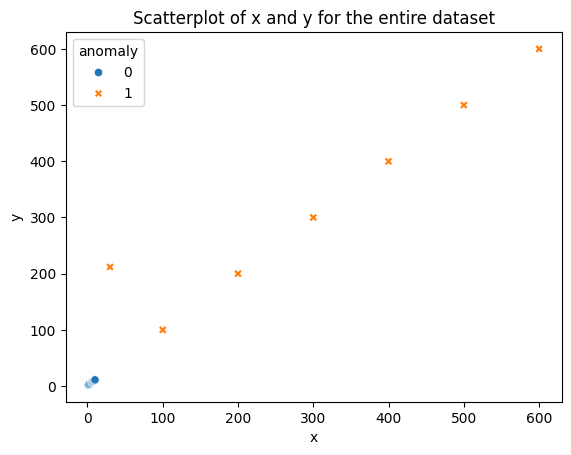

In [76]:
import matplotlib.pyplot as plt

sns.scatterplot(df, x="x", y="y", style="anomaly", hue="anomaly")
plt.title("Scatterplot of x and y for the entire dataset")
plt.show()

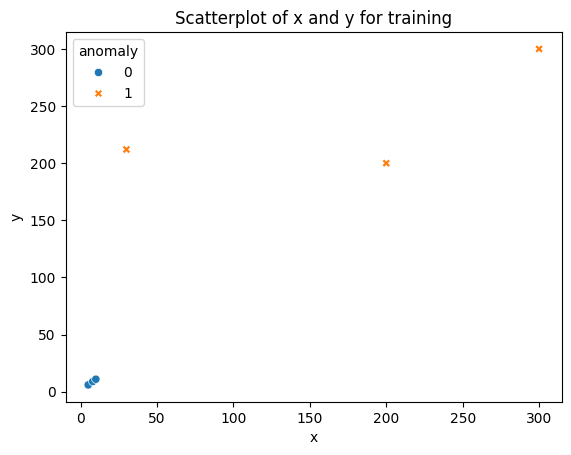

In [77]:
import matplotlib.pyplot as plt

train_df = xtr
train_df["anomaly"] = ytr
sns.scatterplot(train_df, x="x", y="y", style="anomaly", hue="anomaly")
plt.title("Scatterplot of x and y for training")
plt.show()

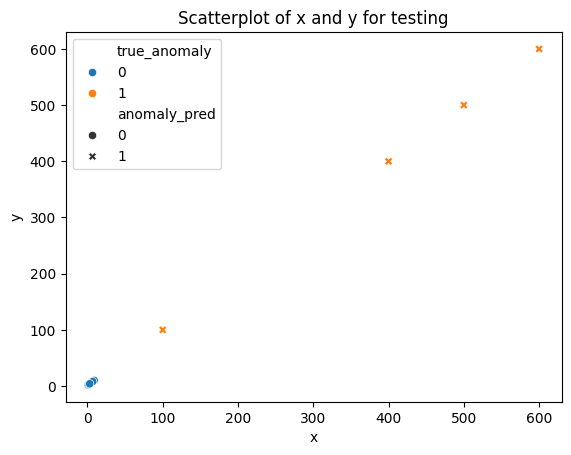

In [78]:
import matplotlib.pyplot as plt


pred_df = xtst.copy()
pred_df["anomaly_pred"] = y_pred
pred_df["true_anomaly"] = ytst

sns.scatterplot(pred_df, x="x", y="y", style="anomaly_pred", hue="true_anomaly")

plt.title("Scatterplot of x and y for testing")
plt.show()